Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "underham2ter"

---

In [2]:
import sympy
import matplotlib.pyplot as plt
import scipy.special as sp, scipy.integrate, scipy.linalg as lg
from scipy import integrate
import numpy as np
import sys
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,8)
import seaborn as sns
sns.set(font_scale=1, rc={'text.usetex' : True})
sns.set_palette(sns.color_palette("hls", 8))

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_next = x0
    err = 1000
    i = 0

    while err >= eps and i < maxiter:
        x = x_next
        x_next = x - f(x) / fder(x)
        err = abs(x_next-x)
        i += 1
    x, niter = x_next, i
    return x, niter

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом
Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

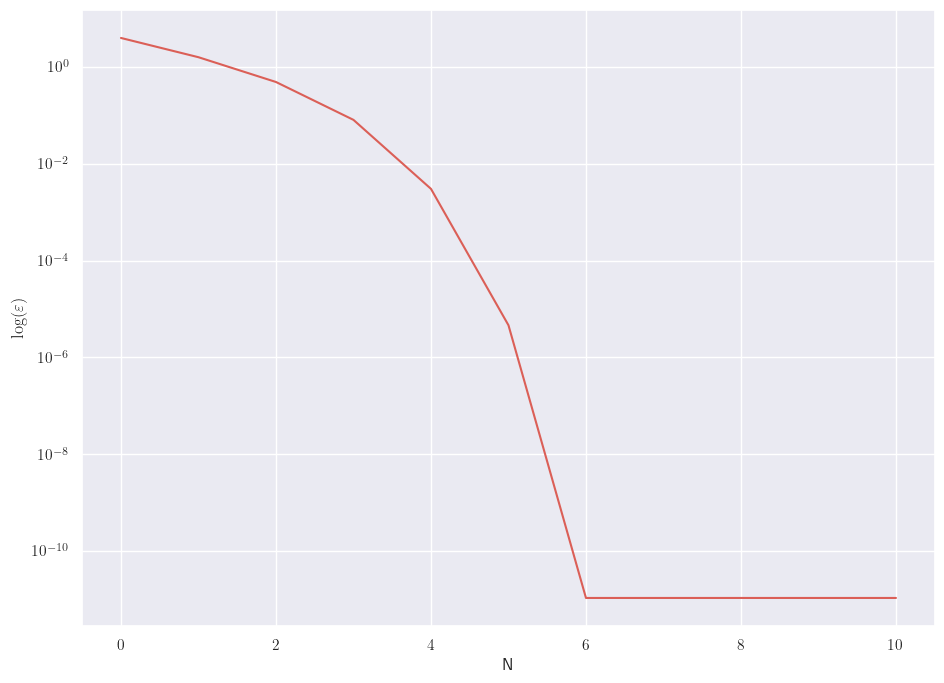

In [5]:
err_ = []
N = np.arange(11)
for n in N:
  x, _ = newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, x0=5, maxiter=n)
  err_.append(abs(x-1))

plt.plot(N, err_)
plt.yscale('log')
plt.xlabel("N")
plt.ylabel(r"$\log(\varepsilon)$")
plt.show()

Сходимость метода - квадратичная.

$\delta_{n+1}\sim \delta_{n}^2\frac{f''}{2f'}$

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}$$

In [6]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """

    x_next = x0
    err = 1000
    i = 0

    while err >= eps and i < maxiter:
        x = x_next
        if fder(x):
            x_next = x - m * f(x) / fder(x)
            err = abs(x_next-x)
            i += 1
        else:
            break
    x, niter = float(x_next), i
    return x, niter

In [7]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [8]:
f = lambda x: (x ** 2 - 1) ** 2
df = lambda x: 2 * (x ** 2 - 1) * 2 * x
m_ = np.arange(6) + 1
for m in m_:
  _, n = mod_newton(f, df, x0=8, maxiter=10000, m=m)
  print(f'm = {m}, N = {n}, x = {_}')

m = 1, N = 23, x = 1.0000091359761536
m = 2, N = 7, x = 1.0000000000000213
m = 3, N = 18, x = 0.9999979839700615
m = 4, N = 10000, x = 8.0
m = 5, N = 10000, x = -2.013327200268916
m = 6, N = 10000, x = 0.6275338563438377


Вообще скорость сходимсоти зависит от выбора начальной точки $x_0$,
но в случаях, когда все модификации сходятся к точке $x = 1$,
модификация $m = 2$ оказывается наиболее эффективной, оюладая квадратичной сходимостью.

# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


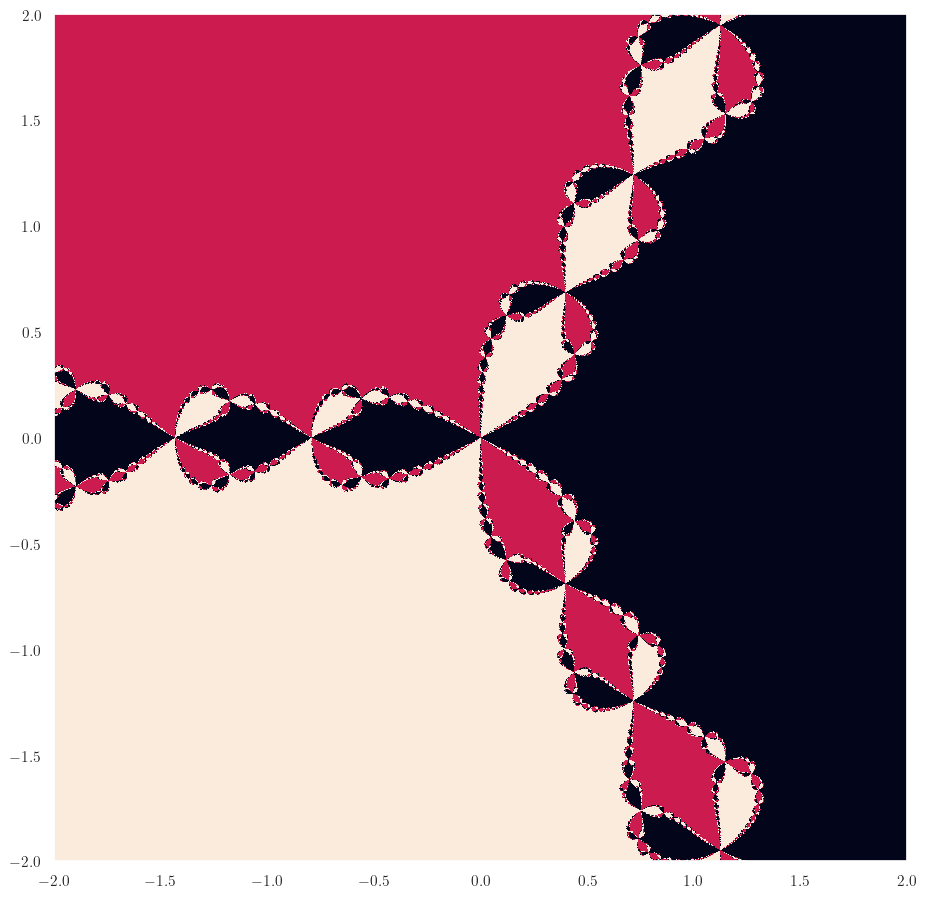

In [15]:

roots=np.exp(np.arange(0,3)*2*np.pi*1j/3)
initialReal=np.linspace(-2,2,5000)
initialImag=np.linspace(-2,2,5000)

XR,YR=np.meshgrid(initialReal,initialImag)
initial=XR+1j*YR
results=np.zeros_like(initial, dtype=float)
f = lambda x: x**3-1
df = lambda x: 3*x**2
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        find_root = abs(roots - newton_iteration(f, df, initial[i,j], maxiter=20)[0])
        results[i,j] = np.argmin(find_root)


fig, ax1 = plt.subplots(figsize=(11, 11))
plt.grid(False)
h = plt.pcolormesh(XR, YR, results)
plt.show()

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [10]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_next = X0
    err = 1000
    i = 0

    while err >= eps and i < maxiter:
        x = x_next
        dx = lg.solve(jcb(x), F(x))
        x_next = x - dx
        err = lg.norm(x_next-x)
        i += 1
    x, niter = x_next, i
    return x, niter

In [11]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [12]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    x1, x2, x3 = sympy.symbols('x1 x2 x3')
    f1, f2, f3 = func2([x1, x2, x3])
    f_ = sympy.Matrix([f1, f2, f3])
    J = f_.jacobian([x1, x2 ,x3])
    J_func = sympy.lambdify((x1, x2, x3), J)
    return J_func(*X)

In [13]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [14]:
# more testing in this cell, keep it intact
